# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

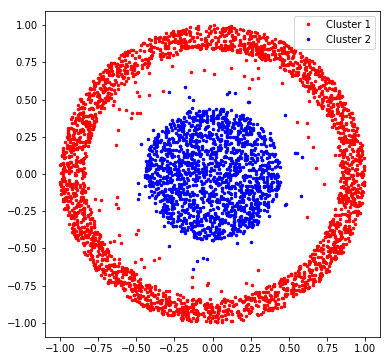

In [6]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 150
threshold = 0.2
# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, threshold)

# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)

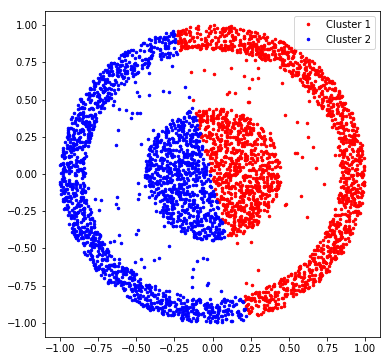

In [7]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [8]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [35]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
from kmeans import kmeans
from spectral import spectral
# YOUR CODE HERE
# begin answer

n = 100
acc = 0
mutual_info = 0
acc_kmeans = 0
mutual_info_kmeans = 0

for i in range(n):
    # spectral clustering
    W = constructW(fea, k=10).toarray()
    idx = bestMap(gnd, spectral(W, np.unique(gnd).shape[0]))
    cnt = np.zeros(fea.shape[0])
    cnt[idx == gnd] = 1
    acc += sum(cnt) / fea.shape[0]
    mutual_info += MutualInfo(gnd, idx)
    
    # k-means clustering
    idx_kmeans = bestMap(gnd, kmeans(W, np.unique(gnd).shape[0]))
    cnt_kmeans = np.zeros(fea.shape[0])
    cnt_kmeans[idx_kmeans == gnd] = 1
    acc_kmeans += sum(cnt_kmeans) / fea.shape[0]
    mutual_info_kmeans += MutualInfo(gnd, idx_kmeans)

print('spectral clustering', 'acc:', acc / n, 'mutual_info:', mutual_info / n)
print('k-means clustering', 'acc:', acc_kmeans / n, 'mutual_info:', mutual_info_kmeans / n)

# end answer

spectral clustering acc: 0.7083623957543592 mutual_info: 0.6242665604802522
k-means clustering acc: 0.4867854435178164 mutual_info: 0.21476507984028273
